## Generate random sample (regression problem)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y, coeffs = make_regression(n_samples=50, n_features=4, n_informative=4, noise=10, coef=True, random_state=42)
display(X, y)

array([[-0.75373616, -0.24538812, -0.81581028, -0.88951443],
       [-0.2257763 ,  1.46564877, -1.42474819,  0.0675282 ],
       [-0.64511975,  0.36163603,  1.53803657,  0.36139561],
       [ 0.29698467,  0.52194157,  0.34644821,  0.25049285],
       [-1.05771093, -0.01349722, -1.22084365,  0.82254491],
       [ 0.15372511, -0.88385744, -1.1429703 ,  0.05820872],
       [ 1.35624003,  0.81252582,  1.0035329 , -0.07201012],
       [ 0.47359243, -1.06230371,  1.54993441, -0.91942423],
       [-0.30921238, -0.83921752,  0.97554513,  0.33126343],
       [-0.85715756,  0.62566735,  0.48247242, -1.0708925 ],
       [ 0.17136828,  0.73846658, -0.3011037 , -0.11564828],
       [ 0.41278093,  0.96337613,  1.89679298,  0.82206016],
       [ 0.34115197, -0.07710171,  0.82718325,  0.2766908 ],
       [ 0.11092259, -0.54438272,  0.37569802, -1.15099358],
       [-0.29169375, -0.60063869,  1.85227818, -0.60170661],
       [-0.32766215, -0.70205309, -1.46351495, -0.39210815],
       [-1.76304016,  0.

array([-201.42348529,   55.01512109,   98.50233564,  108.44325693,
        -98.42574697, -132.06975033,  260.37878851,  -11.46177441,
         -9.76972843,  -45.30132996,   45.11987851,  302.30210595,
         89.36756994,  -87.67084818,   25.22917392, -226.78603055,
       -112.6428451 ,   22.04295716,  171.69681701,   -5.23980118,
        152.21031897, -163.86709178,  116.71831939, -275.09211067,
         22.77705068,  299.10909296, -199.07464079, -128.95853436,
         66.99653404,  -67.16347752,  111.26707471,  170.54175622,
       -152.07142206,   69.06492335,   26.23621154, -148.29405234,
         48.54534548,  -13.13593296,  -16.10984285,   36.34512573,
       -222.93693663, -116.35728776,  120.8347961 ,  195.98475913,
        -10.31492204, -106.18619309, -216.12065089, -228.79136805,
       -133.30173933,  -60.86663698])

In [4]:
coeffs

array([74.07686178, 87.73730719, 70.2484084 , 69.7015741 ])

In [5]:
X.shape, coeffs.shape

((50, 4), (4,))

## Create gradient descent class

In [6]:
def calculate_matrix_loss(X: np.ndarray, w: np.ndarray, y: np.ndarray) -> float:
        return np.sum(np.power((y - (X @ w)), 2)) / 2

class GradientDescent:
    def __init__(self, dimension: int, learning_rate: float = 1e-2, iteration: int = 10000, eps: float = 1e-4) -> None:
        self.w: np.ndarray = np.random.rand(dimension)
        self.learning_rate: float = learning_rate
        self.iteration: int = iteration
        self.eps: float = eps

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> float:
        return (y - (X @ self.w)) @ (-X)

    def update_weights(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.w - self.learning_rate * self.calc_gradient(X, y)

    def run(self, X: np.ndarray, y: np.ndarray) -> tuple:
        next_w = self.w
        logs = pd.DataFrame(columns=['current-weights', 'next-weights', 'loss'])
        for i in np.arange(self.iteration):
            self.w = next_w
            next_w = self.update_weights(X, y)
            log = pd.DataFrame([[self.w, next_w, calculate_matrix_loss(X, self.w, y)]], columns=['current-weights', 'next-weights', 'loss'])
            logs = pd.concat([logs, log], sort=False, ignore_index=True)
            if np.linalg.norm(self.w - next_w, ord=2) <= self.eps:
                break
        return (self.w, logs)

## Create linear regression class

In [7]:
class LinearRegression:
    def __init__(self, iteration: int = 10000, eps: float = 1e-4) -> None:
        self.iteration: int = iteration
        self.eps: float = eps
        self.w = None
        self.logs = None
        self.loss: float = 0

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # add a dummy feature
        X = np.column_stack([X, np.ones(X.shape[0])])
        descent = GradientDescent(dimension=X.shape[1], learning_rate=1e-2, iteration=self.iteration, eps=self.eps)
        self.w, self.logs = descent.run(X, y)
        self.loss = calculate_matrix_loss(X, self.w, y)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return X @ self.w[:-1] + self.w[-1]
        
               

## Split and train data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


In [11]:
regressor.logs.tail(5)

,current-weights,next-weights,loss
53,"[73.55055177489103, 91.86258943841949, 68.7428...","[73.55058104033243, 91.86278420081076, 68.7427...",2305.121938
54,"[73.55058104033243, 91.86278420081076, 68.7427...","[73.55060462809575, 91.86294141866138, 68.7427...",2305.121934
55,"[73.55060462809575, 91.86294141866138, 68.7427...","[73.55062364191446, 91.86306832898799, 68.7427...",2305.121931
56,"[73.55062364191446, 91.86306832898799, 68.7427...","[73.5506389703862, 91.86317077393883, 68.74267...",2305.121930
57,"[73.5506389703862, 91.86317077393883, 68.74267...","[73.55065132905273, 91.86325346960889, 68.7426...",2305.121929


## Prediction wooooah

In [12]:
prediction, loss, weights = regressor.predict(X_test), regressor.loss, regressor.w
print(f"Prediction: {prediction}\nOriginal: {y_test}\nLoss: {loss}\nOriginal weights: {coeffs}\nCalculated weights: {weights}")

Prediction: [ -91.37481161   41.43945137  111.5299893   -90.52563614   32.66790489
 -145.02581286 -198.68155497  279.34465243 -125.39002792   -5.82709649]
Original: [ -87.67084818   36.34512573  111.26707471 -106.18619309   22.04295716
 -133.30173933 -199.07464079  299.10909296 -152.07142206   -5.23980118]
Loss: 2305.1219287501026
Original weights: [74.07686178 87.73730719 70.2484084  69.7015741 ]
Calculated weights: [73.55063897 91.86317077 68.7426791  67.24440303  2.04687192]


## one feature test

In [13]:
X, y, coeffs = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, coef=True, random_state=42)
display(X, y)

array([[ 0.93128012],
       [ 0.08704707],
       [-1.05771093],
       [ 0.31424733],
       [-0.47917424],
       [ 0.64768854],
       [-0.46341769],
       [ 0.54256004],
       [ 0.61167629],
       [ 1.0035329 ],
       [ 0.8219025 ],
       [ 1.53803657],
       [ 0.73846658],
       [-0.21967189],
       [-0.8084936 ],
       [ 0.09176078],
       [-1.95967012],
       [ 0.51326743],
       [ 1.03099952],
       [-2.6197451 ],
       [ 0.49671415],
       [ 0.09707755],
       [-0.46572975],
       [ 0.91540212],
       [ 1.56464366],
       [ 1.46564877],
       [-0.60063869],
       [-0.03582604],
       [-0.60170661],
       [-1.19620662],
       [ 0.35711257],
       [ 0.37569802],
       [ 0.26105527],
       [-0.5297602 ],
       [-0.90802408],
       [ 0.19686124],
       [-0.29900735],
       [ 0.36163603],
       [ 0.82254491],
       [-0.29169375],
       [ 0.36139561],
       [-0.676922  ],
       [ 1.52302986],
       [-0.51827022],
       [-0.23415337],
       [-0

array([  50.77992943,  -10.06527016,  -34.91839191,   10.52674299,
        -17.73837724,   31.56459551,  -30.06888275,    5.91200699,
         23.47337416,   32.34359474,   35.76573341,   76.88323383,
         36.18776792,    2.9244734 ,  -47.81146525,   12.61693126,
        -85.45418019,   20.05162924,   28.63464002, -118.02745409,
         16.77823077,    2.81079984,  -29.36593416,   28.57973536,
         74.71530364,   64.57600193,  -11.01926675,    2.74944415,
        -33.92230425,  -62.09952962,   20.28587171,   29.52220586,
          5.76708113,  -21.69297316,  -43.6490161 ,   -4.01153077,
        -20.19870331,    7.58329135,   51.39997923,    1.74763946,
         22.78482382,  -31.5003787 ,   61.91233294,  -20.69551487,
         -7.6244312 ,   -5.91131407,  -14.17777333,  -38.23228892,
         23.49423306,    8.80963973,   -5.90648058,    7.31453371,
        -29.99628354,   89.03314517,    9.31786907,   24.7816116 ,
         20.00370858,    0.72440436,   -8.86713635,  -85.35925

In [14]:
X.shape, y.shape

((100, 1), (100,))

In [15]:
coeffs

array(41.74110031)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [18]:
regressor.logs.tail(5)

,current-weights,next-weights,loss
10,"[44.241552997378484, 0.09778803574499745]","[44.243160292010295, 0.09866477618256542]",2916.901389
11,"[44.243160292010295, 0.09866477618256542]","[44.24378499016506, 0.0990055527461767]",2916.901157
12,"[44.24378499016506, 0.0990055527461767]","[44.24402779001391, 0.09913800421326797]",2916.901121
13,"[44.24402779001391, 0.09913800421326797]","[44.244122158694175, 0.09918948433008115]",2916.901116
14,"[44.244122158694175, 0.09918948433008115]","[44.24415883687819, 0.09920949311341834]",2916.901115


In [19]:
prediction, loss, weights = regressor.predict(X_test), regressor.loss, regressor.w
print(f"Prediction: {prediction}\nOriginal: {y_test}\nLoss: {loss}\nOriginal weights: {coeffs}\nCalculated weights: {weights}")

Prediction: [-58.66523631  65.48731414  36.04868123 -17.24929154 -10.26072103
 -12.80654441 -20.50661463 -77.90497452  36.46354429  41.30286084
  45.7148583   15.89932172 -53.9159661  -23.33958569 -50.82551096
 -21.10145403  43.26132726  10.80459779  32.77199506  16.7216185 ]
Original: [-48.94907978  89.03314517  44.40919578  -5.91131407  -7.6244312
   1.74763946 -29.36593416 -68.32675437  35.76573341  50.77992943
  28.63464002  20.28587171 -42.22346311 -21.69297316 -56.06201681
 -17.73837724  52.89103498  11.12324828  36.18776792  29.52220586]
Loss: 2916.901115384092
Original weights: 41.7411003148779
Calculated weights: [44.24412216  0.09918948]


In [33]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18)
plt.rcParams["figure.figsize"] = (20, 8)

In [24]:
y_pred = X @ weights[:-1] + weights[-1]

Text(0.5, 1.0, 'Linear regression')

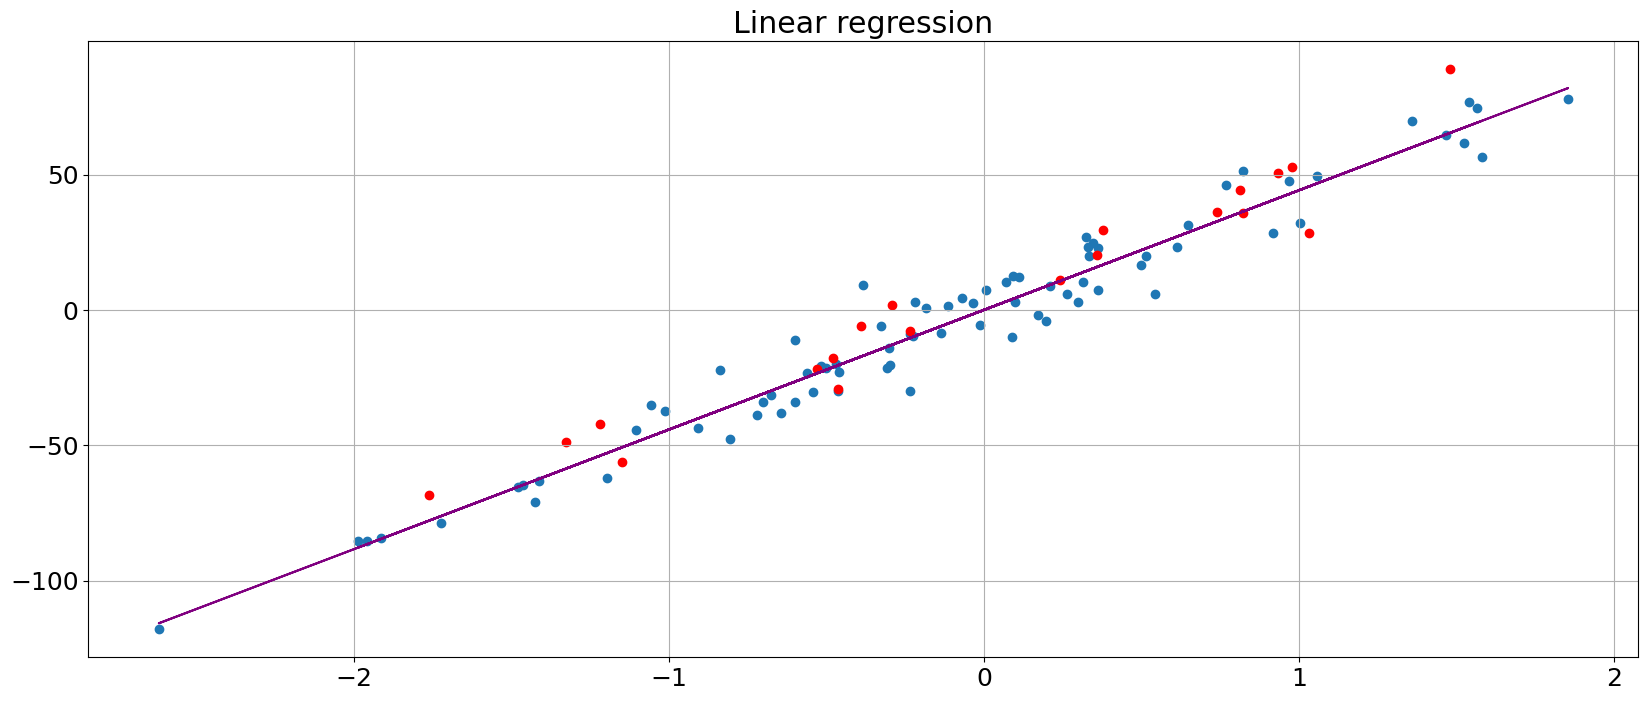

In [34]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color="red")
plt.plot(X, y_pred, color="purple")
plt.grid()
plt.title('Linear regression')